In [52]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
df_raw = pd.read_csv('../data/Occupancy_Estimation.csv')

In [54]:
df_raw.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [55]:
df_raw.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.0,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.0,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.0,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.0,0,0,0
10128,2018/01/11,09:00:09,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.06,0.08,345,0.0,0,0,0


In [56]:
df_raw.shape

(10129, 19)

In [57]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [58]:
# Combine date and time columns
if 'Date' in df_raw.columns and 'Time' in df_raw.columns:
    df_raw['datetime_str'] = df_raw['Date'] + ' ' + df_raw['Time']

    # Convert the combined column to datetime
    df_raw['datetime'] = pd.to_datetime(df_raw['datetime_str'])

    # Drop the original date and time columns
    df_raw.drop(columns=['Date', 'Time', 'datetime_str'], inplace=True)

# Get a list of all the columns
cols = list(df_raw.columns)

# Remove 'datetime' from the list if it exists
if 'datetime' in cols:
    cols.remove('datetime')

# Reorder the DataFrame to have 'datetime' as the first column
df_cleaned = df_raw[['datetime'] + cols]

In [59]:
df_cleaned.head()

,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [60]:
df_cleaned.isnull().sum()

datetime                0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [61]:
df_cleaned.describe()

,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,2017-12-27 20:27:23.034554112,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
min,2017-12-22 10:49:41,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,2017-12-23 09:14:33,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,2017-12-24 07:06:45,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,2017-12-26 04:58:18,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,2018-01-11 09:00:09,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000
std,NaN,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633


In [68]:
df_cleaned.columns

Index(['datetime', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'Mean_Temperature', 'Mean_light', 'Mean_sound',
       'Mean_CO2', 'Mean_CO2_Slope', 'Mean_PIR'],
      dtype='object')

In [63]:
df_cleaned.dtypes

datetime                datetime64[ns]
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
dtype: object

In [67]:
# Calculate the mean of the temperature columns
temp_mean = df_cleaned.loc[:, 'S1_Temp':'S4_Temp'].mean(axis=1)

# Calculate the mean of the light columns
light_mean = df_cleaned.loc[:, 'S1_Light':'S4_Light'].mean(axis=1)

# Calculate the mean of the sound columns
sound_mean = df_cleaned.loc[:, 'S1_Sound':'S4_Sound'].mean(axis=1)

# Calculate the mean of the CO2 columns
co2_mean = df_cleaned['S5_CO2'].mean()

# Calculate the mean of the CO2_Slope columns
co2_slope_mean = df_cleaned['S5_CO2_Slope'].mean()

# Calculate the mean of the PIR columns
pir_mean = df_cleaned.loc[:, 'S6_PIR':'S7_PIR'].mean(axis=1)

# Append the new columns at the end of the DataFrame using .loc
df_cleaned.loc[:, 'Mean_Temperature'] = temp_mean
df_cleaned.loc[:, 'Mean_light'] = light_mean
df_cleaned.loc[:, 'Mean_sound'] = sound_mean
df_cleaned.loc[:, 'Mean_CO2'] = co2_mean
df_cleaned.loc[:, 'Mean_CO2_Slope'] = co2_slope_mean
df_cleaned.loc[:, 'Mean_PIR'] = pir_mean

In [65]:
df_cleaned.head()

,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Mean_Temperature,Mean_light,Mean_sound,Mean_CO2,Mean_CO2_Slope,Mean_PIR
0,2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,...,0.769231,0,0,1,24.9075,62.00,0.0975,460.860401,-0.00483,0.0
1,2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,...,0.646154,0,0,1,24.9225,61.75,0.2750,460.860401,-0.00483,0.0
2,2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,...,0.519231,0,0,1,24.9225,62.00,0.1700,460.860401,-0.00483,0.0
3,2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,...,0.388462,0,0,1,24.9375,62.00,0.1750,460.860401,-0.00483,0.0
4,2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,...,0.253846,0,0,1,24.9375,62.25,0.0900,460.860401,-0.00483,0.0


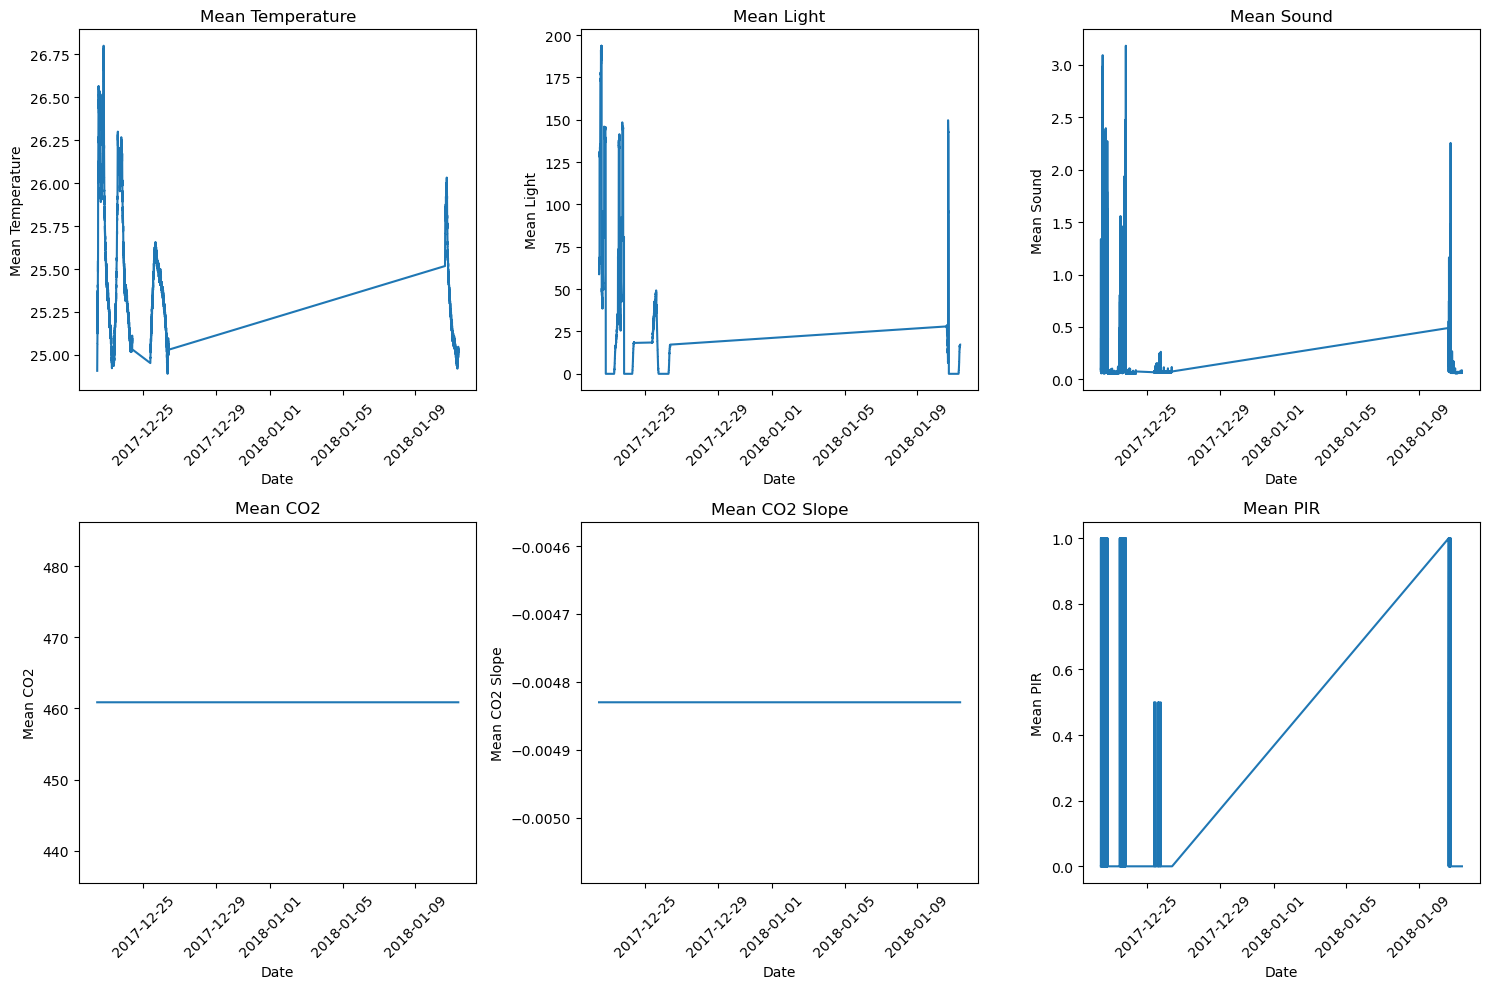

In [86]:
# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the mean columns
axs[0, 0].plot(df_cleaned['datetime'], df_cleaned['Mean_Temperature'])
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Mean Temperature')
plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=45)

axs[0, 1].plot(df_cleaned['datetime'], df_cleaned['Mean_light'])
axs[0, 1].set_title('Mean Light')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Mean Light')
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=45)

axs[0, 2].plot(df_cleaned['datetime'], df_cleaned['Mean_sound'])
axs[0, 2].set_title('Mean Sound')
axs[0, 2].set_xlabel('Date')
axs[0, 2].set_ylabel('Mean Sound')
plt.setp(axs[0, 2].xaxis.get_majorticklabels(), rotation=45)

axs[1, 0].plot(df_cleaned['datetime'], df_cleaned['Mean_CO2'])
axs[1, 0].set_title('Mean CO2')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Mean CO2')
plt.setp(axs[1, 0].xaxis.get_majorticklabels(), rotation=45)

axs[1, 1].plot(df_cleaned['datetime'], df_cleaned['Mean_CO2_Slope'])
axs[1, 1].set_title('Mean CO2 Slope')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Mean CO2 Slope')
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45)

axs[1, 2].plot(df_cleaned['datetime'], df_cleaned['Mean_PIR'])
axs[1, 2].set_title('Mean PIR')
axs[1, 2].set_xlabel('Date')
axs[1, 2].set_ylabel('Mean PIR')
plt.setp(axs[1, 2].xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
# Filter weekdays
df_weekdays = df_cleaned[df_cleaned['datetime'].dt.dayofweek < 5]

# Filter weekends
df_weekends = df_cleaned[df_cleaned['datetime'].dt.dayofweek >= 5]

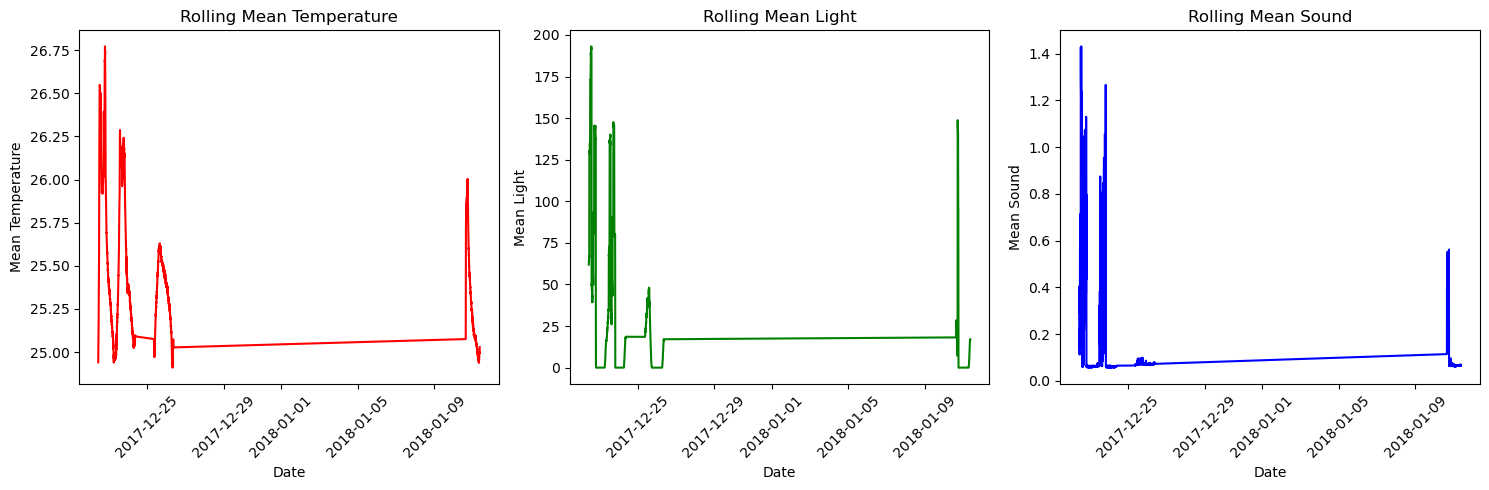

In [87]:
# Define the rolling window size
window_size = 10

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the rolling mean temperature
axs[0].plot(df_cleaned['datetime'], df_cleaned['Mean_Temperature'].rolling(window_size).mean(), color='red')
axs[0].set_title('Rolling Mean Temperature')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Mean Temperature')
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

# Plot the rolling mean light
axs[1].plot(df_cleaned['datetime'], df_cleaned['Mean_light'].rolling(window_size).mean(), color='green')
axs[1].set_title('Rolling Mean Light')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Mean Light')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Plot the rolling mean sound
axs[2].plot(df_cleaned['datetime'], df_cleaned['Mean_sound'].rolling(window_size).mean(), color='blue')
axs[2].set_title('Rolling Mean Sound')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Mean Sound')
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [89]:
# Create a new column 'is_weekend' that is True if the day of the week is a weekend and False otherwise
df_cleaned.loc[:, 'is_weekend'] = np.where(df_cleaned['datetime'].dt.dayofweek < 5, 'Weekday', 'Weekend')

# Group by the 'is_weekend' column and calculate the mean of the other columns
df_grouped = df_cleaned.groupby('is_weekend').mean()

df_grouped

,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Mean_Temperature,Mean_light,Mean_sound,Mean_CO2,Mean_CO2_Slope,Mean_PIR
is_weekend,,,,,,,,,,,,,,,,,,,,,
Weekday,2017-12-30 09:30:31.064906240,25.454020,25.561556,25.104543,25.754938,23.498250,27.741489,34.491409,13.816736,0.162773,...,-0.004468,0.098791,0.097996,0.413140,25.468764,24.886971,0.138278,460.860401,-0.00483,0.098393
Weekend,2017-12-23 16:35:35.473068032,25.453999,25.520710,24.978233,25.752795,28.629456,23.194379,33.851158,12.244601,0.177018,...,-0.005422,0.075982,0.049441,0.374707,25.426434,24.479899,0.136361,460.860401,-0.00483,0.062711


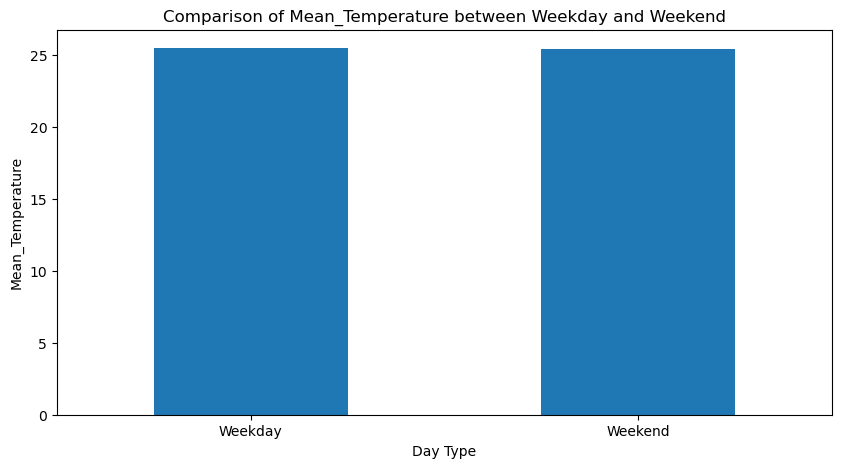

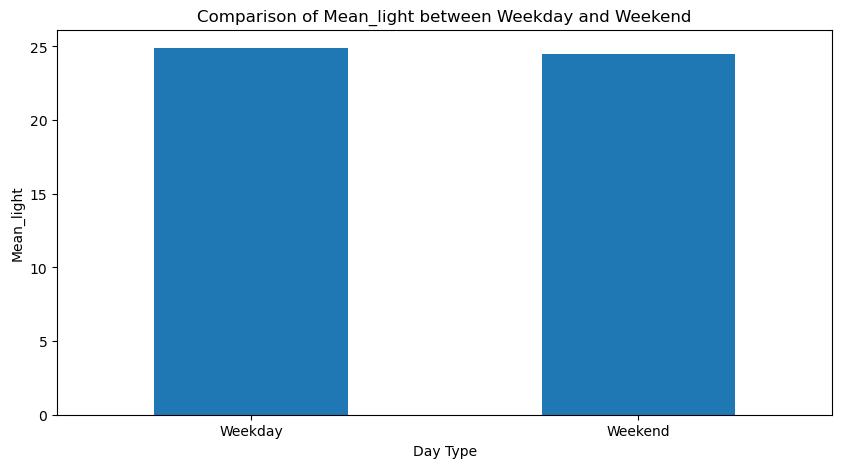

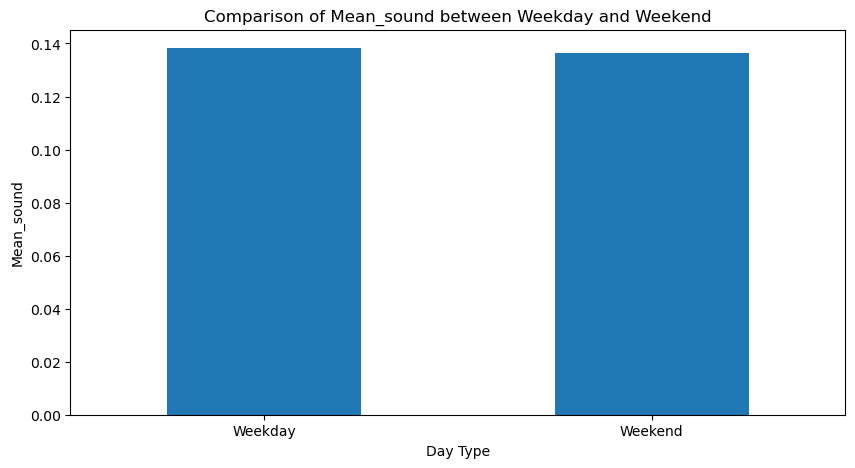

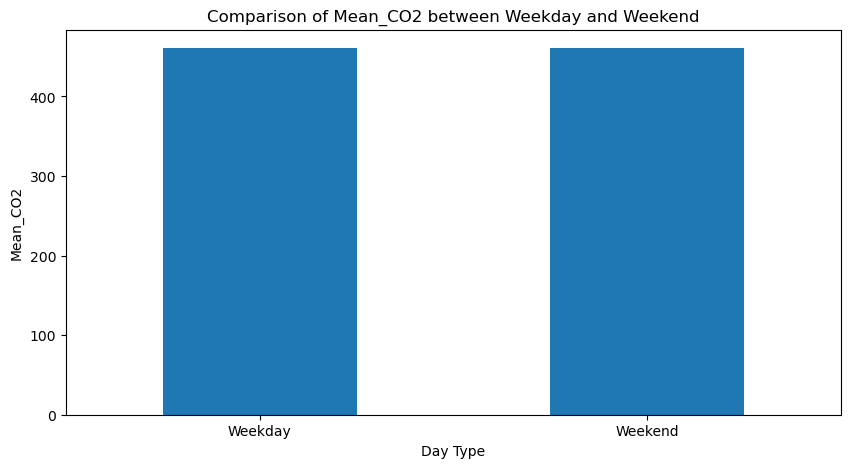

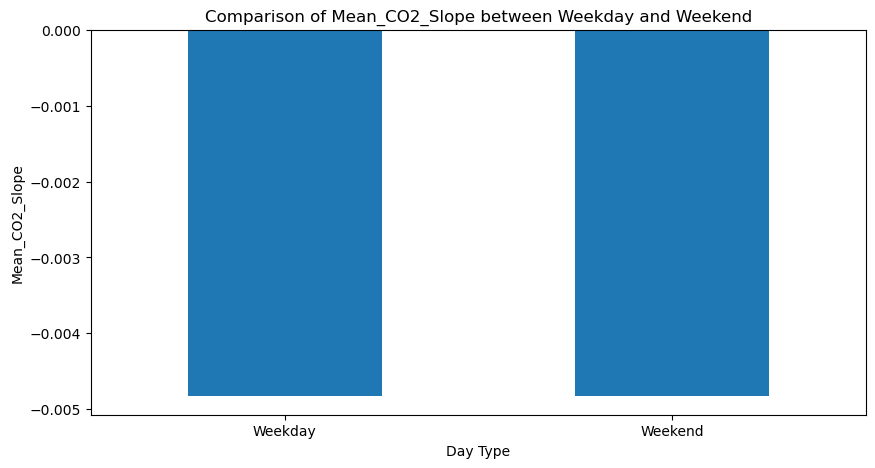

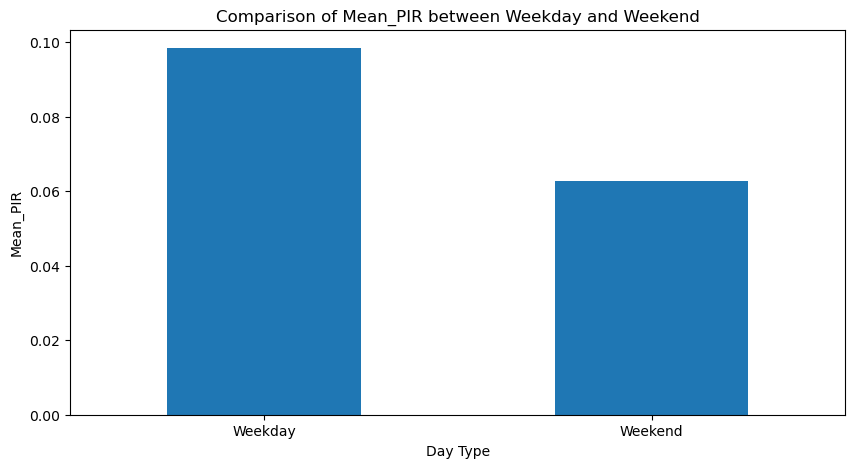

In [91]:
# List of mean columns
mean_columns = ['Mean_Temperature', 'Mean_light', 'Mean_sound', 'Mean_CO2', 'Mean_CO2_Slope', 'Mean_PIR']

# Create a bar plot for each mean column in the grouped DataFrame
for column in mean_columns:
    if column in df_grouped.columns:
        df_grouped[column].plot(kind='bar', figsize=(10, 5))
        plt.title('Comparison of ' + column + ' between Weekday and Weekend')
        plt.ylabel(column)
        plt.xlabel('Day Type')
        plt.xticks(rotation=0)  # to keep the x-axis labels vertical
        plt.show()

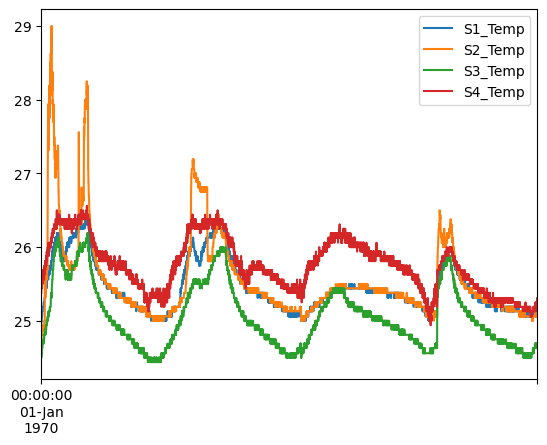

In [103]:
# Compare temperature readings from different sensors
df_cleaned[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].plot()
plt.show()

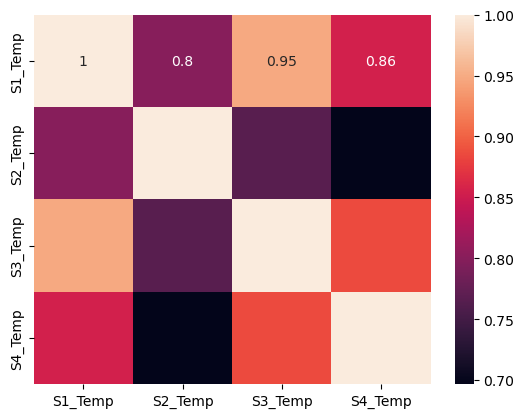

In [104]:
# Compute the correlation matrix for the temperature sensors
correlation_matrix = df_cleaned[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

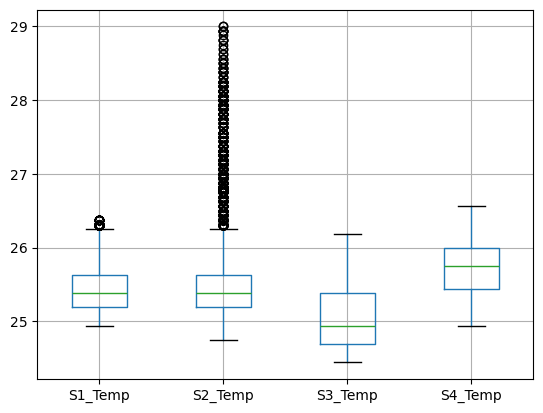

In [105]:
# Create a box plot for the temperature sensors
df_cleaned[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].boxplot()
plt.show()

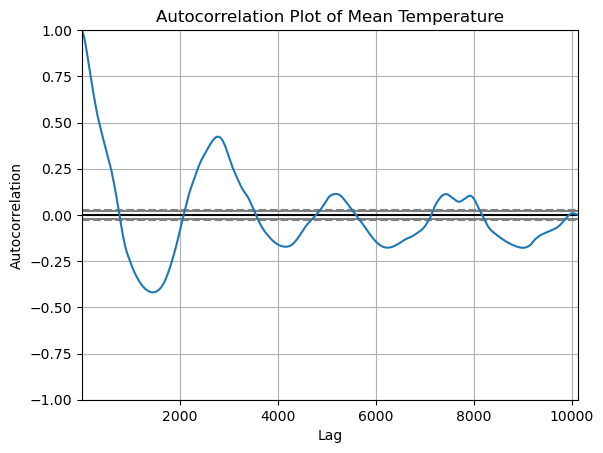

In [113]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df_cleaned['Mean_Temperature'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of Mean Temperature')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

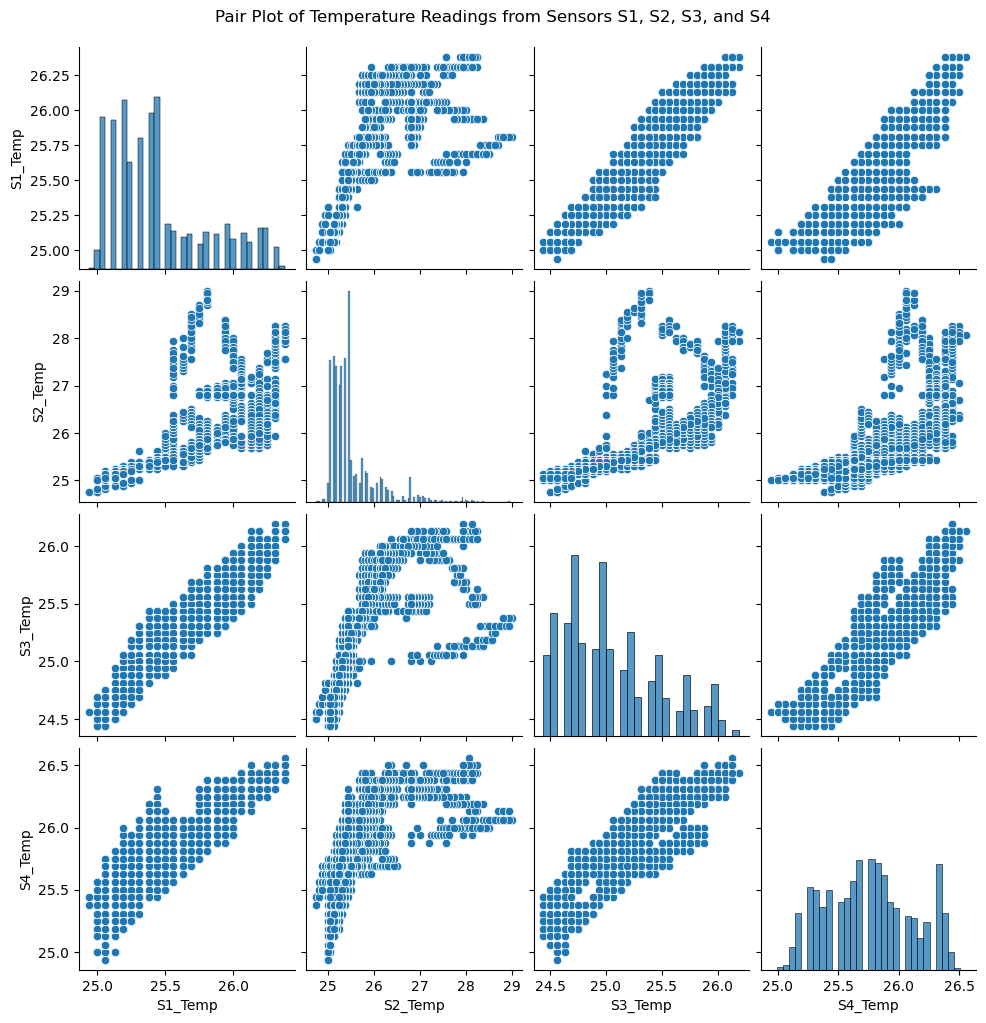

In [122]:
sns.pairplot(df_cleaned[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']])
plt.suptitle('Pair Plot of Temperature Readings from Sensors S1, S2, S3, and S4', y=1.02)  # increased y value
plt.show();

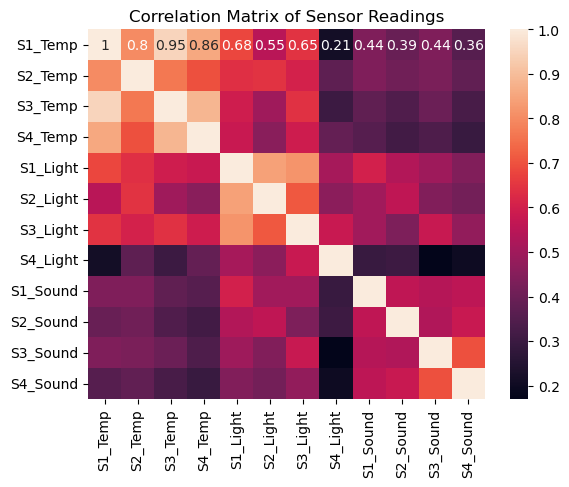

In [118]:
correlation_matrix = df_cleaned[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Sensor Readings')
plt.show()